<a href="https://colab.research.google.com/github/yousrabougara/WalmartSalesForecasting/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor
from category_encoders import BinaryEncoder
import pickle
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Walmart.csv')

In [ ]:
df['WeekOfMonth']=pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,WeekOfMonth
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,6
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,7
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,8
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,9


In [ ]:
X=df.drop(['Date', 'Weekly_Sales'], axis=1)
Y=df['Weekly_Sales']
X.head().to_string()

'   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  WeekOfMonth\n0      1             0        42.31       2.572  211.096358         8.106            5\n1      1             1        38.51       2.548  211.242170         8.106            6\n2      1             0        39.93       2.514  211.289143         8.106            7\n3      1             0        46.63       2.561  211.319643         8.106            8\n4      1             0        46.50       2.625  211.350143         8.106            9'

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X, Y.values.reshape(-1, 1))
Y = np.log(Y)
Y

,Weekly_Sales
0,14.312455
1,14.311400
2,14.292966
3,14.158907
4,14.256862
...,...
6430,13.477481
6431,13.505522
6432,13.506897
6433,13.484400


In [ ]:
features = df.columns.drop(['Weekly_Sales','Date'])
target = 'Weekly_Sales'


X = df[features]
y = df[target]


Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0382 - val_loss: 0.0234
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0224 - val_loss: 0.0210
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0206 - val_loss: 0.0198
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0192 - val_loss: 0.0185
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0188 - val_loss: 0.0181
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0174 - val_loss: 0.0177
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176 - val_loss: 0.0178
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0179 - val_loss: 0.0177
Epoch 9/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0176 - val_loss: 0.0172
Epoch 10/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178 - val_loss: 0.0172
Epoch 11/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0167 - val_loss: 0.0172
Epoch 12/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

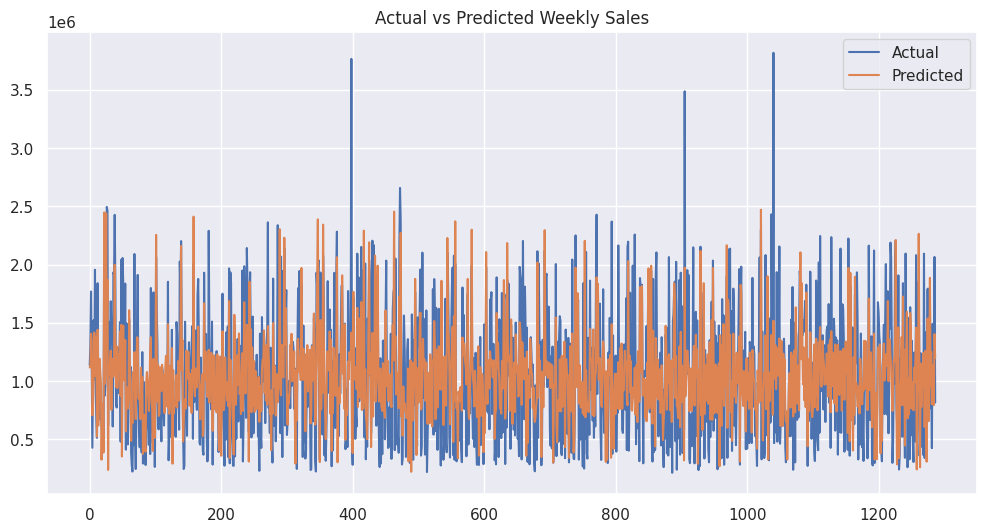

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt



# Scale the features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape input for LSTM: (samples, time steps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, random_state=42, test_size=0.2)

# Define LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.3f}')

# Predictions from the model
predictions = model.predict(X_test)

# Inverse transform predictions and true values to original scale
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Metrics computation
r2 = r2_score(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# MAPE computation
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE while avoiding division by zero."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

# Print the metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

# Visualization of predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10, random_state=42)
model = model.fit(X_train, y_train, eval_set=(X_test, y_test))
model

0:	learn: 0.4846694	test: 0.4952746	best: 0.4952746 (0)	total: 57.3ms	remaining: 57.2s
10:	learn: 0.4045917	test: 0.4115368	best: 0.4115368 (10)	total: 184ms	remaining: 16.5s
20:	learn: 0.3512969	test: 0.3586090	best: 0.3586090 (20)	total: 269ms	remaining: 12.5s
30:	learn: 0.3134412	test: 0.3192029	best: 0.3192029 (30)	total: 348ms	remaining: 10.9s
40:	learn: 0.2794642	test: 0.2839663	best: 0.2839663 (40)	total: 421ms	remaining: 9.85s
50:	learn: 0.2527873	test: 0.2569166	best: 0.2569166 (50)	total: 498ms	remaining: 9.27s
60:	learn: 0.2326658	test: 0.2373751	best: 0.2373751 (60)	total: 562ms	remaining: 8.66s
70:	learn: 0.2130611	test: 0.2179232	best: 0.2179232 (70)	total: 647ms	remaining: 8.46s
80:	learn: 0.1999961	test: 0.2042596	best: 0.2042596 (80)	total: 749ms	remaining: 8.5s
90:	learn: 0.1878741	test: 0.1917536	best: 0.1917536 (90)	total: 810ms	remaining: 8.09s
100:	learn: 0.1746255	test: 0.1786614	best: 0.1786614 (100)	total: 877ms	remaining: 7.81s
110:	learn: 0.1643402	test: 0.16

In [ ]:
#Prediction
prediction = model.predict(X_test)

In [ ]:
#R2
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, prediction)
print("R-squared (R2) score:", r2)

R-squared (R2) score: 0.9893649628123325


In [ ]:
# Afficher les précisions
print("Training set Accuracy:", round(model.score(X_train, y_train), 3) * 100)
print("Test set Accuracy:", round(model.score(X_test, y_test), 3) * 100)

Training set Accuracy: 99.3
Test set Accuracy: 98.9


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split



def objective(trial):
    # Définir les hyperparamètres spécifiques à CatBoost
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-2, 0.1, log=True),
        "depth": trial.suggest_int("depth", 4, 7),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0.0, 1.0),
    }

    # Créer le modèle avec les paramètres proposés
    model = CatBoostRegressor(
        **params,
        verbose=0,  # Désactiver les logs pendant l'entraînement
        random_seed=42,
    )

    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Prédictions sur le jeu de test
    y_pred = model.predict(X_test)

    # Calculer le score R² (le score à maximiser)
    r2 = r2_score(y_test, y_pred)

    return r2



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Créer une étude Optuna pour maximiser le score R²
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Afficher les meilleurs paramètres trouvés par Optuna
best_params = study.best_params
print("Best parameters found by Optuna:", best_params)

# Construire le modèle avec les meilleurs paramètres trouvés
catboost_best = CatBoostRegressor(
    **best_params,
    verbose=0,  # Désactiver les logs
    random_seed=42,
)

# Entraîner le modèle final sur le jeu d'entraînement
catboost_best.fit(X_train, y_train)

# Évaluation sur le jeu de test
y_pred = catboost_best.predict(X_test)

# Calculer les scores d'évaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Final Test R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Afficher les précisions
print("Training set Accuracy:", round(catboost_best.score(X_train, y_train), 3) * 100)
print("Test set Accuracy:", round(catboost_best.score(X_test, y_test), 3) * 100)


[I 2025-01-21 17:44:07,756] A new study created in memory with name: no-name-f14346d0-664d-4ce3-b067-6b55c7ab3547
[I 2025-01-21 17:44:10,638] Trial 0 finished with value: 0.8848902823061028 and parameters: {'iterations': 732, 'learning_rate': 0.013644381375314023, 'depth': 4, 'l2_leaf_reg': 4.0879070076380035, 'bagging_temperature': 0.9246754422729935, 'random_strength': 0.6353185359327463}. Best is trial 0 with value: 0.8848902823061028.
[I 2025-01-21 17:44:12,732] Trial 1 finished with value: 0.9873096085422984 and parameters: {'iterations': 636, 'learning_rate': 0.0943475908861697, 'depth': 4, 'l2_leaf_reg': 3.84519215393836, 'bagging_temperature': 0.5902518522050275, 'random_strength': 0.025778132840683976}. Best is trial 1 with value: 0.9873096085422984.
[I 2025-01-21 17:44:13,208] Trial 2 finished with value: 0.7786842426039704 and parameters: {'iterations': 116, 'learning_rate': 0.046057266514366285, 'depth': 4, 'l2_leaf_reg': 3.5486495053123894, 'bagging_temperature': 0.8475000

Best parameters found by Optuna: {'iterations': 879, 'learning_rate': 0.08906974418912089, 'depth': 7, 'l2_leaf_reg': 3.753692336164798, 'bagging_temperature': 0.8745740514122993, 'random_strength': 0.20716110169280547}
Final Test R2 Score: 0.9915706688938567
Mean Squared Error (MSE): 0.003010379490927806
Root Mean Squared Error (RMSE): 0.05486692529136115
Mean Absolute Error (MAE): 0.038765008927555515
Training set Accuracy: 99.7
Test set Accuracy: 99.2
